# 해시태그 데이터로 워드클라우드 만들기

In [30]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [ ]:
#런타임 다시 시작

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic') 

In [8]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 제주핫플레이스.csv to 제주핫플레이스.csv


In [9]:
import pandas as pd
raw_df = pd.read_csv(filename)
raw_df.tags[:3]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
Name: tags, dtype: object

In [10]:
raw_df.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [11]:
tags = raw_df.tags[0]
tags

"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이']"

In [12]:
tags[2:-2].split("', '")[:5]

['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳']

In [13]:
a = ['#시작']
a.append(tags[2:-2].split("', '")[:5])
a

['#시작', ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳']]

In [14]:
a = ['#시작']
a.extend(tags[2:-2].split("', '")[:5])
a

['#시작', '#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳']

In [15]:
tags_total = []
for tags in raw_df.tags:
  tags_total.extend(tags[2:-2].split("', '")[:5])

tags_total[:10]

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주핫플',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도맛집']

## 해시태그 출현 빈도

### collections 모듈

In [18]:
from collections import Counter, OrderedDict

In [17]:
s = 'A quick brown'

In [18]:
Counter(s)

Counter({' ': 2,
         'A': 1,
         'b': 1,
         'c': 1,
         'i': 1,
         'k': 1,
         'n': 1,
         'o': 1,
         'q': 1,
         'r': 1,
         'u': 1,
         'w': 1})

In [21]:
sl = ['A', 'quick', 'brown', 'brown']
Counter(sl)

Counter({'A': 1, 'brown': 2, 'quick': 1})

In [29]:
t = '안녕하세요'
Counter(t)

Counter({'녕': 1, '세': 1, '안': 1, '요': 1, '하': 1})

In [22]:
d = dict()
d['x'] = 1
d['k'] = 2
d['m'] = 3
d

{'k': 2, 'm': 3, 'x': 1}

In [24]:
od = OrderedDict()
od['x'] = 1
od['k'] = 2
od['m'] = 3
od

OrderedDict([('x', 1), ('k', 2), ('m', 3)])

In [25]:
for k, v in od.items():
  print(k, v)

x 1
k 2
m 3


## 해시태그 빈도 집계

In [26]:
tag_counts = Counter(tags_total)
tag_counts

Counter({'#제주핫플레이스': 53,
         '#제주여행': 1156,
         '#제주도여행': 407,
         '#제주가볼만한곳': 50,
         '#제주핫플': 165,
         '#제주': 808,
         '#제주도': 984,
         '#제주도맛집': 831,
         '#honestin': 1,
         '#어니스틴': 1,
         '#제주관광': 624,
         '#제주살이': 91,
         '#제주이주민': 3,
         '#아라동주민': 2,
         '#삼남매집': 2,
         '#돔나이트': 1,
         '#스트레스': 18,
         '#풀자': 1,
         '#제주에인감귤밭': 47,
         '#감귤체험': 48,
         '#귤따기체험': 47,
         '#체험농장': 40,
         '#감귤따기체험': 41,
         '#niceweather': 2,
         '#winterswimming': 2,
         '#바다수영': 2,
         '#겨울수영': 3,
         '#제주에서한복입고여행하기': 2,
         '#한복입는선흘집': 3,
         '#파스텔제주': 3,
         '#레드향': 4,
         '#천혜향': 2,
         '#한라봉': 5,
         '#귤오름농원': 1,
         '#귤농장': 1,
         '#두피반영구': 51,
         '#셀카': 108,
         '#선팔': 118,
         '#제주눈썹예쁜곳': 33,
         '#제주속눈썹연장': 173,
         '#제주볼거리': 16,
         '#무료입장': 12,
         '#제주먹거리': 11,
         '#캔디원':

In [28]:
# 데이터 정제하기
stopwords = ['#jeju', '#일상', '', '#제주', '#제주도', '#선팔', '#제주눈썹문신', 
             '#서귀포눈썹문신', '#반영구', '#눈썹문신', '#제주자연눈썹',
             '#제주속눈썹', '#서귀포남자문신'] 

'''tags_total_refined = []
for tag in tags_total:
  if tag not in stopwords:
    tags_total_refined(tag)'''
tags_total = [tag for tag in tags_total if tag not in stopwords]

tag_counts = Counter(tags_total)
tag_counts.most_common(50)


[('#제주여행', 1156),
 ('#제주맛집', 946),
 ('#제주도맛집', 831),
 ('#제주관광', 624),
 ('#성산일출봉', 522),
 ('#성산일출봉맛집', 505),
 ('#섭지코지', 491),
 ('#섭지코지맛집', 482),
 ('#통갈치구이', 477),
 ('#제주도여행', 407),
 ('#제주흑돼지맛집', 344),
 ('#서귀포', 231),
 ('#제주흑돼지', 231),
 ('#서귀포남자눈썹문신', 229),
 ('#서귀포자연눈썹', 218),
 ('#제주실탄사격장', 198),
 ('#제주남자눈썹문신', 189),
 ('#제주속눈썹연장', 173),
 ('#서귀포맛집', 166),
 ('#중문흑돼지맛집', 166),
 ('#제주핫플', 165),
 ('#여행', 147),
 ('#제주도민', 124),
 ('#제주카페', 121),
 ('#서귀포속눈썹', 119),
 ('#중문맛집', 117),
 ('#애월맛집', 116),
 ('#셀카', 108),
 ('#서귀포맛집추천', 105),
 ('#제주도흑돼지', 97),
 ('#관광지순환버스', 96),
 ('#이벤트', 96),
 ('#데일리', 95),
 ('#2019', 95),
 ('#신제주맛집', 94),
 ('#제주시맛집', 93),
 ('#첫줄', 92),
 ('#새해', 92),
 ('#제주살이', 91),
 ('#먹스타그램', 91),
 ('#제주도가볼만한곳', 86),
 ('#제주버스여행', 86),
 ('#붙임머리', 84),
 ('#서귀포흑돼지맛집', 84),
 ('#제주술집', 82),
 ('#Repost', 79),
 ('#제주도이색맛집', 78),
 ('#협재맛집', 77),
 ('#제주반영구문신', 75),
 ('#육팔청춘', 75)]

## 워드클라우드 만들기

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [29]:
! ls -l /usr/share/fonts/truetype/nanum

total 28836
-rw-r--r-- 1 root root 4413912 Dec  3  2017 NanumBarunGothicBold.ttf
-rw-r--r-- 1 root root 4184028 Dec  3  2017 NanumBarunGothic.ttf
-rw-r--r-- 1 root root 4642244 Dec  3  2017 NanumGothicBold.ttf
-rw-r--r-- 1 root root 4691820 Dec  3  2017 NanumGothic.ttf
-rw-r--r-- 1 root root 4183592 Dec  3  2017 NanumMyeongjoBold.ttf
-rw-r--r-- 1 root root 3839464 Dec  3  2017 NanumMyeongjo.ttf
-rw-r--r-- 1 root root  733500 Dec  3  2017 NanumSquareB.ttf
-rw-r--r-- 1 root root 1030948 Dec  3  2017 NanumSquareRoundB.ttf
-rw-r--r-- 1 root root 1063276 Dec  3  2017 NanumSquareRoundR.ttf
-rw-r--r-- 1 root root  723640 Dec  3  2017 NanumSquareR.ttf


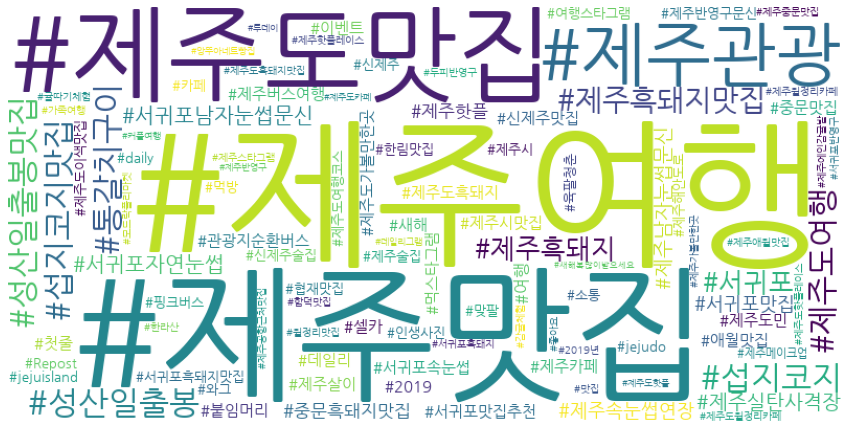

In [30]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=path,
                      background_color='white',
                      max_words=100,
                      relative_scaling=0.3,
                      width=800, height=400
                      ).generate_from_frequencies(tag_counts)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()